# INSTALLING THE NECESSARY LIBRARIES

In [1]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install scipy
!pip install pickle-mixin
!pip install seaborn
!pip install Flask
!pip install Xgboost

# IMPORTING THE NECESSARY LIBRARIES

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle as pkl
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,RidgeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn.pipeline import Pipeline

# IMPORTING THE DATASET AND READING IT

In [5]:
#from google.colab import files
#uploaded = files.upload()

# Assuming the file is named 'data.xlsx'
dt = pd.read_excel('data.xlsx')


In [7]:
dt.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,4.0,3.0,6.0,3.0,4.0,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,4.0,3.0,6.0,3.0,4.0,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,4.0,3.0,6.0,3.0,4.0,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,4.0,3.0,6.0,3.0,4.0,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,4.0,3.0,6.0,3.0,4.0,150.0,56,34,YES,YES


# SEPERATING DEPENDANT AND INDEPENDANT VARIABLE

In [9]:
x = dt.iloc[:, :-1]
y = dt.iloc[:, -1]

# HANDLING MISSING NUMERIC DATA

In [12]:
numeric_columns = ['TCH', 'TG', 'LDL', 'HDL', 'PCV  (%)', 'RBC  (million cells/microliter)', 'MCV   (femtoliters/cell)',
                   'MCH  (picograms/cell)', 'MCHC  (grams/deciliter)', 'Total Count', 'Lymphocytes  (%)',
                   'Monocytes   (%)', 'Eosinophils   (%)', 'Basophils  (%)', 'Platelet Count  (lakhs/mm)',
                   'Indirect     (mg/dl)', 'Total Protein     (g/dl)', 'Albumin   (g/dl)', 'Globulin  (g/dl)',
                   'AL.Phosphatase      (U/L)']
numeric_imputer = SimpleImputer(strategy='mean')
x[numeric_columns] = numeric_imputer.fit_transform(x[numeric_columns])

# ENCODING CATEGORICAL DATA

In [15]:
bp_split = dt['Blood pressure (mmhg)'].str.split('/', expand=True)
x['Systolic'] = pd.to_numeric(bp_split[0], errors='coerce')
x['Diastolic'] = pd.to_numeric(bp_split[1], errors='coerce')
x = x.drop(columns=['Blood pressure (mmhg)','S.NO'])

#print("Columns in x before transformation:")
#print(x.columns)
x = pd.DataFrame(x)

In [17]:
#if not isinstance(x, pd.DataFrame):
#    raise ValueError("x should be a pandas DataFrame")

# Print column names for verification
#print("Columns in x before transformation:")
#print(x.columns)


cat_columns = ['Gender', 'Place(location where the patient lives)', 'Type of alcohol consumed',
               'Hepatitis B infection', 'Hepatitis C infection', 'Diabetes Result', 'Obesity',
               'Family history of cirrhosis/ hereditary', 'USG Abdomen (diffuse liver or  not)']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),cat_columns)], remainder='passthrough')

#ct = make_column_transformer((OneHotEncoder(), cat_columns), remainder='passthrough')
x_encoded = ct.fit_transform(x)
x_encoded = pd.DataFrame(x_encoded, columns=ct.get_feature_names_out())
#x_encoded=x_encoded.apply(pd.to_numeric, errors='coerce')
#x_encoded = pd.DataFrame(x_encoded, columns=transformed_columns)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

'''
# Get feature names from one-hot encoder
onehot_features = ct.named_transformers_['encoder'].get_feature_names_out(cat_columns)

# Get remaining feature names that were not one-hot encoded
passthrough_features = [column for column in x.columns if column not in cat_columns]

# Combine the two lists
all_features = list(onehot_features) + passthrough_features

# Print all feature names
print(all_features)
'''
# Assuming x is already defined after preprocessing steps like dropping columns
#print("Columns in x:")
#print(x.columns)
# Check if all columns in cat_columns exist in x.columns
#missing_columns = [col for col in cat_columns if col not in x.columns]

#if missing_columns:
#    print("Error: The following categorical columns are missing in x:", missing_columns)
#else:
#    print("All categorical columns are correctly specified and present in x.")
#print(ct)



#transformed_columns = ct.get_feature_names_out()
#print("Transformed columns:")
#print(transformed_columns)


"\n# Get feature names from one-hot encoder\nonehot_features = ct.named_transformers_['encoder'].get_feature_names_out(cat_columns)\n\n# Get remaining feature names that were not one-hot encoded\npassthrough_features = [column for column in x.columns if column not in cat_columns]\n\n# Combine the two lists\nall_features = list(onehot_features) + passthrough_features\n\n# Print all feature names\nprint(all_features)\n"

# PREPROCESSED DATA

In [20]:
preprocessed_data = pd.DataFrame(x_encoded, columns=ct.get_feature_names_out())
preprocessed_data['Predicted Value'] = y_encoded
'''
# Define preprocessing pipeline

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, cat_columns)
    ])
'''    

"\n# Define preprocessing pipeline\n\nnumeric_transformer = Pipeline(steps=[\n    ('imputer', SimpleImputer(strategy='mean')),\n    ('scaler', StandardScaler())\n])\n\ncategorical_transformer = Pipeline(steps=[\n    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),\n    ('onehot', OneHotEncoder(handle_unknown='ignore'))\n])\n\npreprocessor = ColumnTransformer(\n    transformers=[\n        ('num', numeric_transformer, numeric_columns),\n        ('cat', categorical_transformer, cat_columns)\n    ])\n"

In [22]:
preprocessed_data.isnull().sum()
#x_encoded.isnull().sum()

encoder__Gender_female                                       0
encoder__Gender_female                                       0
encoder__Gender_male                                         0
encoder__Gender_transgender                                  0
encoder__Place(location where the patient lives)_ ocun       0
encoder__Place(location where the patient lives)_rural       0
encoder__Place(location where the patient lives)_urban       0
encoder__Place(location where the patient lives)_nan         0
encoder__Type of alcohol consumed_ branded liquor            0
encoder__Type of alcohol consumed_both                       0
encoder__Type of alcohol consumed_branded liquor             0
encoder__Type of alcohol consumed_country liquor             0
encoder__Hepatitis B infection_Positive                      0
encoder__Hepatitis B infection_negative                      0
encoder__Hepatitis B infection_positive                      0
encoder__Hepatitis C infection_Positive                

# FEATURE SCALING

In [25]:
scaler = StandardScaler()
normalized_features = scaler.fit_transform(preprocessed_data.drop(columns=['Predicted Value']))
normalized_data = pd.DataFrame(normalized_features, columns=preprocessed_data.columns[:-1])
normalized_data['Predicted Value'] = preprocessed_data['Predicted Value']
print(normalized_data.head())
#Fit and transform the data
'''
X = dt.drop(columns=['Predicted Value'])
y = dt['Predicted Value']
X_preprocessed = preprocessor.fit_transform(X)

# Save the preprocessor
joblib.dump(preprocessor, 'preprocessor.pkl')
'''

   encoder__Gender_female  encoder__Gender_female   encoder__Gender_male  \
0               -0.508211                -0.108234              0.534342   
1               -0.508211                -0.108234              0.534342   
2               -0.508211                -0.108234              0.534342   
3               -0.508211                -0.108234              0.534342   
4                1.967688                -0.108234             -1.871462   

   encoder__Gender_transgender  \
0                    -0.072739   
1                    -0.072739   
2                    -0.072739   
3                    -0.072739   
4                    -0.072739   

   encoder__Place(location where the patient lives)_ ocun  \
0                                          -0.032461        
1                                          -0.032461        
2                                          -0.032461        
3                                          -0.032461        
4                                

"\nX = dt.drop(columns=['Predicted Value'])\ny = dt['Predicted Value']\nX_preprocessed = preprocessor.fit_transform(X)\n\n# Save the preprocessor\njoblib.dump(preprocessor, 'preprocessor.pkl')\n"

In [27]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [29]:
os=RandomOverSampler(random_state=0)
#us=RandomUnderSampler(random_state=0)

In [31]:
normalized_data,normalized_data['Predicted Value']=os.fit_resample(normalized_data,normalized_data['Predicted Value'])
#normalized_data,normalized_data['Predicted Value']=us.fit_resample(normalized_data,normalized_data['Predicted Value'])

In [33]:
normalized_data['Predicted Value'].value_counts()

Predicted Value
0    876
2    876
1    876
Name: count, dtype: int64

In [35]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#x_test_normalized = scaler.fit_transform(x_test)

# SPLITTING DATA INTO TRAINING AND TEST SETS

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(normalized_data.iloc[:, :-1], normalized_data['Predicted Value'], test_size=0.2, random_state=42)
#x_train, x_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (2102, 57)
Shape of x_test: (526, 57)
Shape of y_train: (2102,)
Shape of y_test: (526,)


# DATA ANALYSIS

## DESCRIPTIVE STATISTICS

In [44]:
dt.describe()

,S.NO,Age,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),TCH,TG,LDL,HDL,Hemoglobin (g/dl),PCV (%),...,Platelet Count (lakhs/mm),Total Bilirubin (mg/dl),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L)
count,950.000000,950.000000,950.000000,950.000000,591.000000,591.000000,590.000000,582.000000,950.000000,920.000000,...,950.000000,950.000000,950.000000,895.000000,889.000000,941.000000,921.000000,940.000000,950.000000,950.000000
mean,475.500000,50.632632,20.606316,5.158947,197.544839,161.527919,106.106780,35.486254,10.263979,33.810000,...,1.493200,6.088632,4.040737,2.457542,5.590326,2.797131,3.245060,132.524468,81.794737,61.565263
std,274.385677,8.808272,7.980664,22.908785,26.694968,25.892519,21.973447,7.982057,1.942300,5.751592,...,0.682498,2.214698,2.757443,1.093691,1.314308,2.198999,1.341187,27.462559,31.106923,31.306928
min,1.000000,32.000000,4.000000,1.000000,100.000000,86.000000,49.000000,25.000000,4.000000,12.000000,...,0.520000,0.300000,0.800000,0.200000,2.500000,0.900000,1.000000,56.000000,32.000000,23.000000
25%,238.250000,44.000000,15.000000,2.000000,180.000000,150.000000,96.000000,30.000000,9.000000,30.000000,...,1.200000,4.800000,2.700000,2.000000,4.800000,2.000000,2.500000,110.000000,59.000000,41.000000
50%,475.500000,50.000000,20.000000,2.000000,194.000000,166.000000,106.000000,35.000000,10.000000,35.000000,...,1.420000,6.000000,3.700000,2.300000,6.000000,2.500000,3.100000,130.000000,74.000000,49.000000
75%,712.750000,57.000000,26.000000,3.000000,210.000000,180.000000,116.000000,38.000000,11.500000,38.000000,...,1.700000,7.500000,4.200000,3.000000,6.400000,3.000000,4.000000,150.000000,96.000000,76.000000
max,950.000000,80.000000,45.000000,180.000000,296.000000,206.000000,220.000000,81.000000,15.900000,48.000000,...,9.000000,11.000000,25.000000,6.600000,8.300000,22.000000,30.000000,206.000000,204.000000,216.000000


# VISUAL ANALYSIS

# UNIVARIATE ANALYSIS

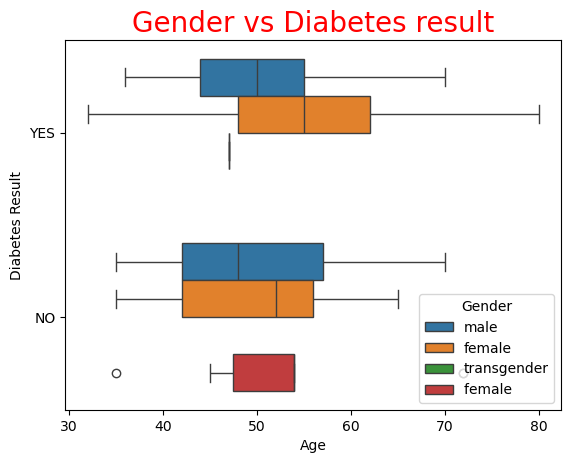

In [48]:
sns.boxplot(x='Age',y='Diabetes Result',data=dt,hue='Gender')
plt.title('Gender vs Diabetes result',color='red',size=20)
plt.show()

<Axes: xlabel='Place(location where the patient lives)', ylabel='Age'>

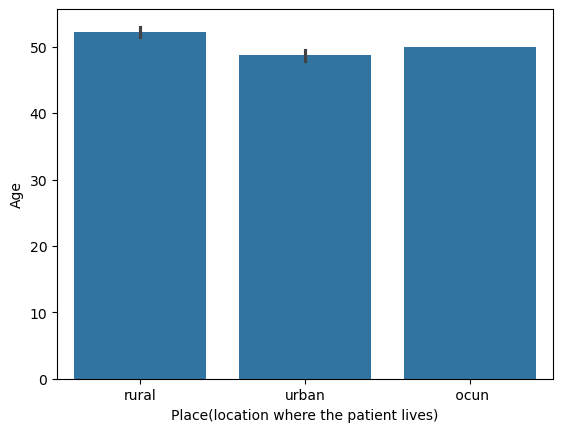

In [49]:
sns.barplot(x=dt['Place(location where the patient lives)'],y=dt['Age'])

Text(0.5, 1.0, 'Place vs Age')

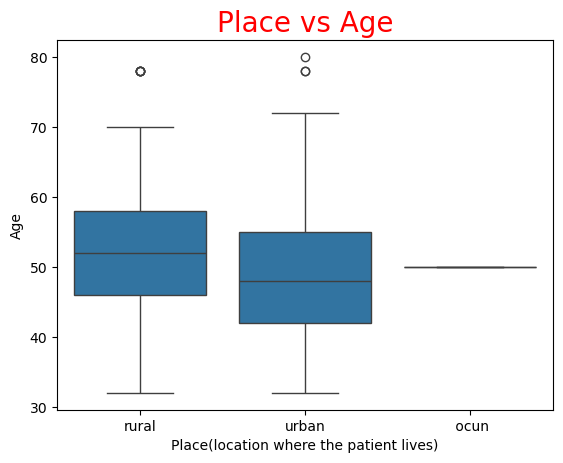

In [50]:
sns.boxplot(x='Place(location where the patient lives)',y='Age',data=dt)
plt.title('Place vs Age',color='red',size=20)

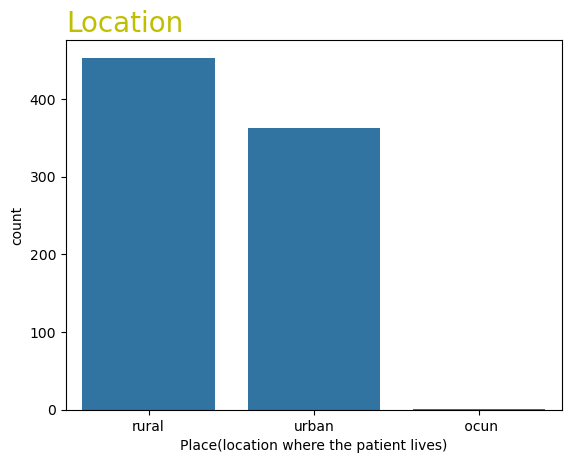

In [52]:
sns.countplot(data=dt,x='Place(location where the patient lives)')
plt.title("Location",color='y',size=20,loc="left")
plt.show()

# BIVARIATE ANALYSIS

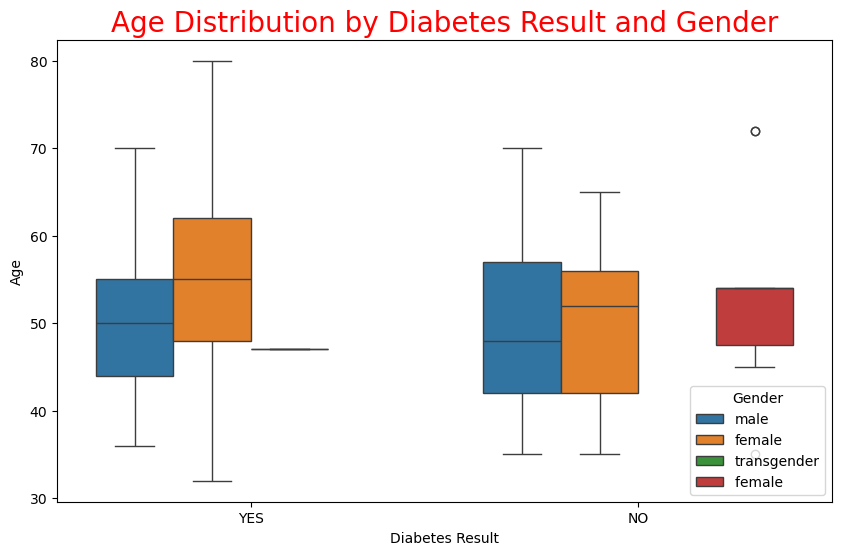

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes Result', y='Age', data=dt, hue='Gender')
plt.title('Age Distribution by Diabetes Result and Gender', color='red', size=20)
plt.xlabel('Diabetes Result')
plt.ylabel('Age')
plt.show()

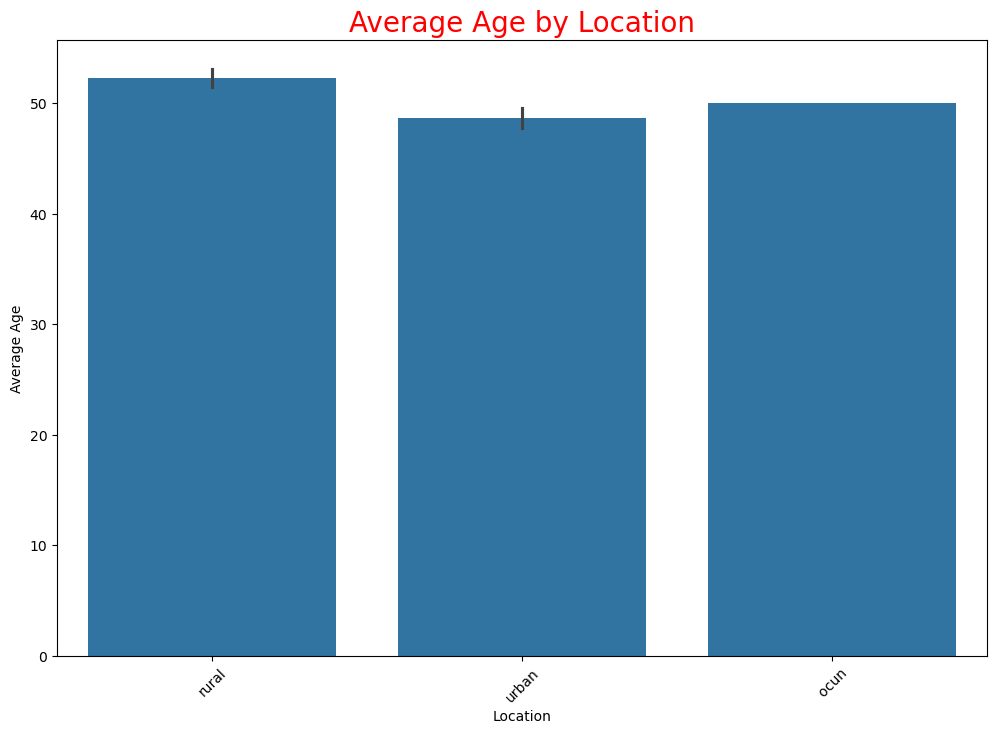

In [58]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Place(location where the patient lives)', y='Age', data=dt)
plt.title('Average Age by Location', color='red', size=20)
plt.xlabel('Location')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.show()

# MULTIVARIATE ANALYSIS

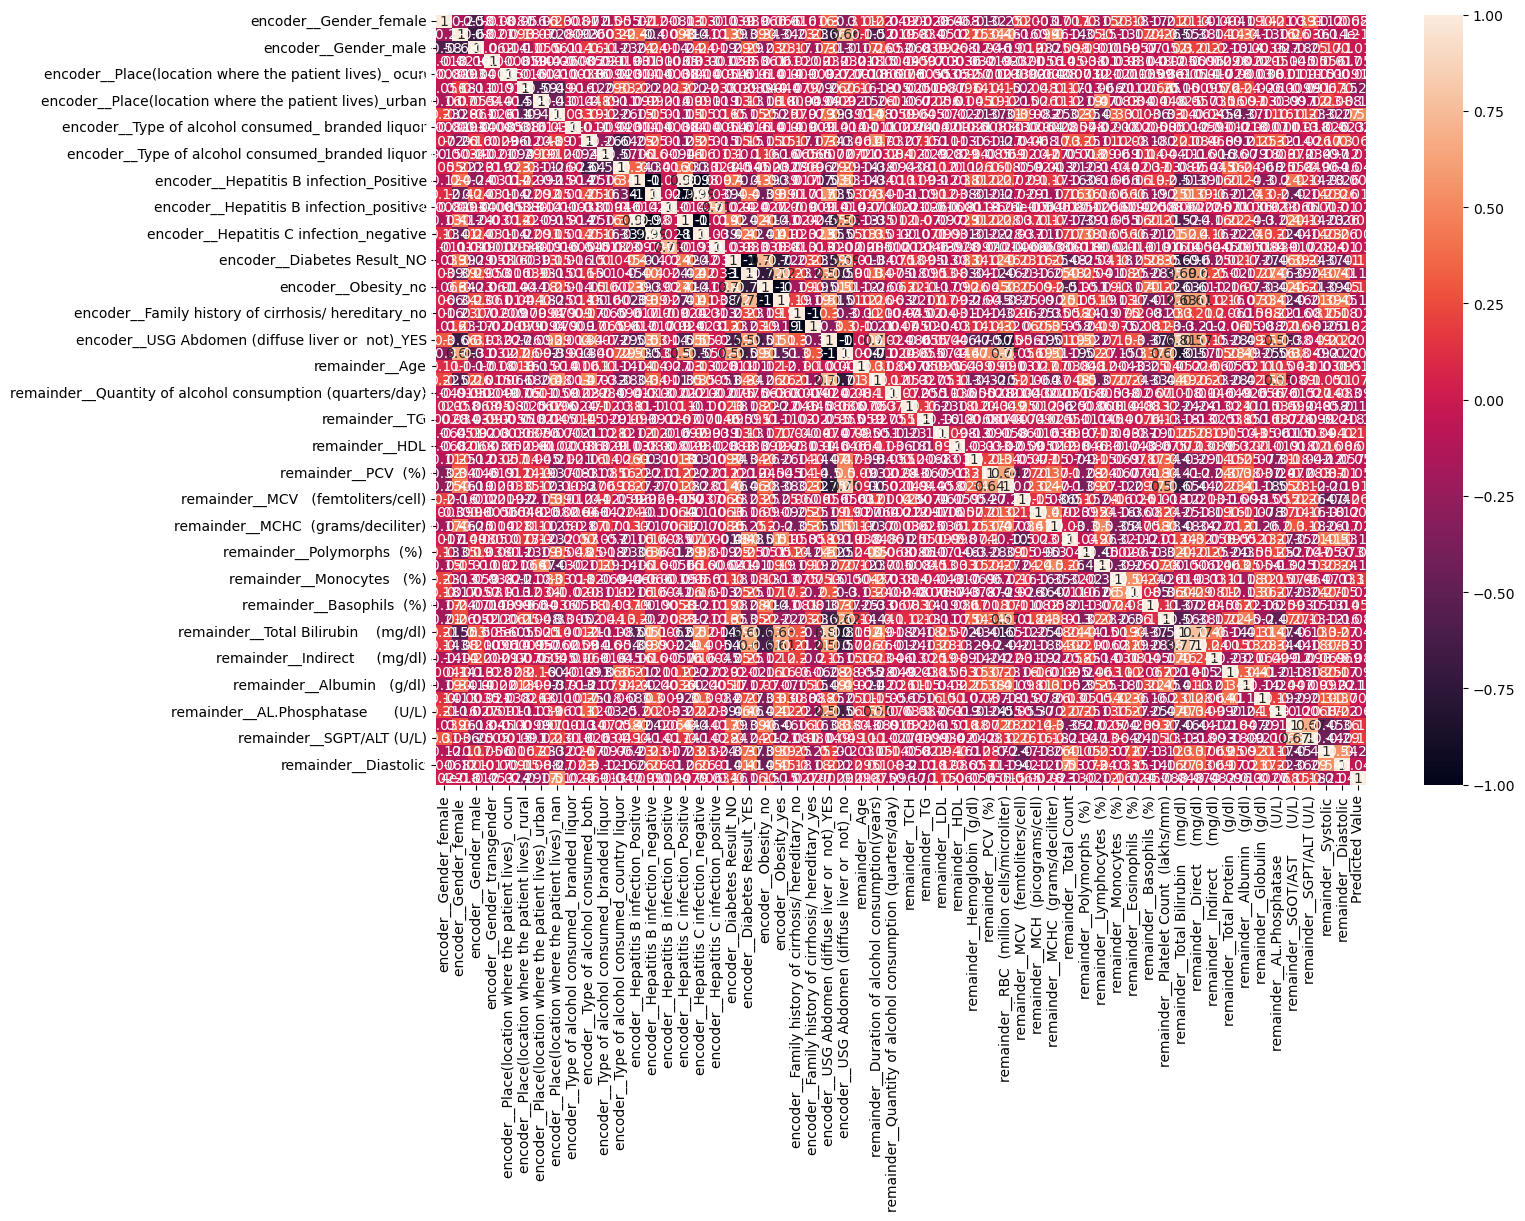

In [60]:
plt.figure(figsize=(15,10))
sns.heatmap(normalized_data.corr(),annot=True)
plt.show()

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [64]:
x_train

,encoder__Gender_female,encoder__Gender_female,encoder__Gender_male,encoder__Gender_transgender,encoder__Place(location where the patient lives)_ ocun,encoder__Place(location where the patient lives)_rural,encoder__Place(location where the patient lives)_urban,encoder__Place(location where the patient lives)_nan,encoder__Type of alcohol consumed_ branded liquor,encoder__Type of alcohol consumed_both,...,remainder__Direct (mg/dl),remainder__Indirect (mg/dl),remainder__Total Protein (g/dl),remainder__Albumin (g/dl),remainder__Globulin (g/dl),remainder__AL.Phosphatase (U/L),remainder__SGOT/AST (U/L),remainder__SGPT/ALT (U/L),remainder__Systolic,remainder__Diastolic
1208,-0.508211,9.239244,-1.871462,-0.072739,-0.032461,-0.954709,1.274484,-0.405235,-0.032461,-0.659580,...,-1.103319,-4.312503e-01,-2.284780e-01,0.641342,0.193160,-0.824978,0.907197,0.269563,-0.162504,0.043365
2355,1.967688,-0.108234,-1.871462,-0.072739,-0.032461,-0.954709,-0.784631,2.467702,-0.032461,-0.659580,...,-0.377627,5.112869e-01,-1.251539e+00,-0.775868,-0.185674,-1.264489,-0.250711,-0.625279,-0.789550,-0.669376
482,1.967688,-0.108234,-1.871462,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-0.740473,-1.373787e+00,-4.645689e-01,0.092745,-0.943341,-1.337741,0.263915,-0.050024,-0.413322,-0.669376
1199,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-1.175888,-4.312503e-01,-1.497810e-01,1.098507,0.117393,-1.703999,0.907197,0.269563,-0.789550,-0.669376
438,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,-0.954709,-0.784631,2.467702,-0.032461,-0.659580,...,-0.014781,1.830839e+00,7.612981e-03,-0.547286,0.571994,-1.264489,-1.601604,-1.232493,0.464542,0.756105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,-0.508211,9.239244,-1.871462,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-1.175888,-4.312503e-01,-1.497810e-01,1.098507,0.117393,-1.703999,0.907197,0.269563,-0.789550,-0.669376
1095,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-1.103319,-4.312503e-01,1.188068e+00,0.641342,-0.564507,-2.802776,0.907197,0.269563,-0.789550,-0.669376
1130,-0.508211,9.239244,-1.871462,-0.072739,-0.032461,-0.954709,1.274484,-0.405235,-0.032461,-0.659580,...,-1.103319,-4.312503e-01,1.424159e+00,0.641342,-0.337207,-1.557496,0.907197,0.269563,0.464542,0.043365
1294,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-1.103319,-4.312503e-01,6.371888e-01,0.641342,-0.564507,-1.557496,0.907197,0.269563,-0.789550,-0.669376


In [65]:
print(x_train.columns)

Index(['encoder__Gender_female', 'encoder__Gender_female ',
       'encoder__Gender_male', 'encoder__Gender_transgender',
       'encoder__Place(location where the patient lives)_ ocun',
       'encoder__Place(location where the patient lives)_rural',
       'encoder__Place(location where the patient lives)_urban',
       'encoder__Place(location where the patient lives)_nan',
       'encoder__Type of alcohol consumed_ branded liquor',
       'encoder__Type of alcohol consumed_both',
       'encoder__Type of alcohol consumed_branded liquor',
       'encoder__Type of alcohol consumed_country liquor',
       'encoder__Hepatitis B infection_Positive',
       'encoder__Hepatitis B infection_negative',
       'encoder__Hepatitis B infection_positive',
       'encoder__Hepatitis C infection_Positive',
       'encoder__Hepatitis C infection_negative',
       'encoder__Hepatitis C infection_positive',
       'encoder__Diabetes Result_NO', 'encoder__Diabetes Result_YES',
       'encoder__Obesit

In [66]:
print(x.dtypes)

Age                                                 int64
Gender                                             object
Place(location where the patient lives)            object
Duration of alcohol consumption(years)              int64
Quantity of alcohol consumption (quarters/day)      int64
Type of alcohol consumed                           object
Hepatitis B infection                              object
Hepatitis C infection                              object
Diabetes Result                                    object
Obesity                                            object
Family history of cirrhosis/ hereditary            object
TCH                                               float64
TG                                                float64
LDL                                               float64
HDL                                               float64
Hemoglobin  (g/dl)                                float64
PCV  (%)                                          float64
RBC  (million 

In [67]:
y_train

1208    1
2355    2
482     0
1199    1
438     0
       ..
1638    1
1095    1
1130    1
1294    1
860     0
Name: Predicted Value, Length: 2102, dtype: int32

In [68]:
y_test

221     0
318     0
926     0
2488    2
1420    1
       ..
76      0
2075    2
620     2
1151    1
1220    1
Name: Predicted Value, Length: 526, dtype: int32

# LOGISTIC REGRESSION

In [70]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=500)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [71]:
x_train

,encoder__Gender_female,encoder__Gender_female,encoder__Gender_male,encoder__Gender_transgender,encoder__Place(location where the patient lives)_ ocun,encoder__Place(location where the patient lives)_rural,encoder__Place(location where the patient lives)_urban,encoder__Place(location where the patient lives)_nan,encoder__Type of alcohol consumed_ branded liquor,encoder__Type of alcohol consumed_both,...,remainder__Direct (mg/dl),remainder__Indirect (mg/dl),remainder__Total Protein (g/dl),remainder__Albumin (g/dl),remainder__Globulin (g/dl),remainder__AL.Phosphatase (U/L),remainder__SGOT/AST (U/L),remainder__SGPT/ALT (U/L),remainder__Systolic,remainder__Diastolic
1208,-0.508211,9.239244,-1.871462,-0.072739,-0.032461,-0.954709,1.274484,-0.405235,-0.032461,-0.659580,...,-1.103319,-4.312503e-01,-2.284780e-01,0.641342,0.193160,-0.824978,0.907197,0.269563,-0.162504,0.043365
2355,1.967688,-0.108234,-1.871462,-0.072739,-0.032461,-0.954709,-0.784631,2.467702,-0.032461,-0.659580,...,-0.377627,5.112869e-01,-1.251539e+00,-0.775868,-0.185674,-1.264489,-0.250711,-0.625279,-0.789550,-0.669376
482,1.967688,-0.108234,-1.871462,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-0.740473,-1.373787e+00,-4.645689e-01,0.092745,-0.943341,-1.337741,0.263915,-0.050024,-0.413322,-0.669376
1199,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-1.175888,-4.312503e-01,-1.497810e-01,1.098507,0.117393,-1.703999,0.907197,0.269563,-0.789550,-0.669376
438,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,-0.954709,-0.784631,2.467702,-0.032461,-0.659580,...,-0.014781,1.830839e+00,7.612981e-03,-0.547286,0.571994,-1.264489,-1.601604,-1.232493,0.464542,0.756105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,-0.508211,9.239244,-1.871462,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-1.175888,-4.312503e-01,-1.497810e-01,1.098507,0.117393,-1.703999,0.907197,0.269563,-0.789550,-0.669376
1095,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-1.103319,-4.312503e-01,1.188068e+00,0.641342,-0.564507,-2.802776,0.907197,0.269563,-0.789550,-0.669376
1130,-0.508211,9.239244,-1.871462,-0.072739,-0.032461,-0.954709,1.274484,-0.405235,-0.032461,-0.659580,...,-1.103319,-4.312503e-01,1.424159e+00,0.641342,-0.337207,-1.557496,0.907197,0.269563,0.464542,0.043365
1294,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-1.103319,-4.312503e-01,6.371888e-01,0.641342,-0.564507,-1.557496,0.907197,0.269563,-0.789550,-0.669376


In [72]:
y_train

1208    1
2355    2
482     0
1199    1
438     0
       ..
1638    1
1095    1
1130    1
1294    1
860     0
Name: Predicted Value, Length: 2102, dtype: int32

# KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [75]:
x_train

,encoder__Gender_female,encoder__Gender_female,encoder__Gender_male,encoder__Gender_transgender,encoder__Place(location where the patient lives)_ ocun,encoder__Place(location where the patient lives)_rural,encoder__Place(location where the patient lives)_urban,encoder__Place(location where the patient lives)_nan,encoder__Type of alcohol consumed_ branded liquor,encoder__Type of alcohol consumed_both,...,remainder__Direct (mg/dl),remainder__Indirect (mg/dl),remainder__Total Protein (g/dl),remainder__Albumin (g/dl),remainder__Globulin (g/dl),remainder__AL.Phosphatase (U/L),remainder__SGOT/AST (U/L),remainder__SGPT/ALT (U/L),remainder__Systolic,remainder__Diastolic
1208,-0.508211,9.239244,-1.871462,-0.072739,-0.032461,-0.954709,1.274484,-0.405235,-0.032461,-0.659580,...,-1.103319,-4.312503e-01,-2.284780e-01,0.641342,0.193160,-0.824978,0.907197,0.269563,-0.162504,0.043365
2355,1.967688,-0.108234,-1.871462,-0.072739,-0.032461,-0.954709,-0.784631,2.467702,-0.032461,-0.659580,...,-0.377627,5.112869e-01,-1.251539e+00,-0.775868,-0.185674,-1.264489,-0.250711,-0.625279,-0.789550,-0.669376
482,1.967688,-0.108234,-1.871462,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-0.740473,-1.373787e+00,-4.645689e-01,0.092745,-0.943341,-1.337741,0.263915,-0.050024,-0.413322,-0.669376
1199,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-1.175888,-4.312503e-01,-1.497810e-01,1.098507,0.117393,-1.703999,0.907197,0.269563,-0.789550,-0.669376
438,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,-0.954709,-0.784631,2.467702,-0.032461,-0.659580,...,-0.014781,1.830839e+00,7.612981e-03,-0.547286,0.571994,-1.264489,-1.601604,-1.232493,0.464542,0.756105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,-0.508211,9.239244,-1.871462,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-1.175888,-4.312503e-01,-1.497810e-01,1.098507,0.117393,-1.703999,0.907197,0.269563,-0.789550,-0.669376
1095,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-1.103319,-4.312503e-01,1.188068e+00,0.641342,-0.564507,-2.802776,0.907197,0.269563,-0.789550,-0.669376
1130,-0.508211,9.239244,-1.871462,-0.072739,-0.032461,-0.954709,1.274484,-0.405235,-0.032461,-0.659580,...,-1.103319,-4.312503e-01,1.424159e+00,0.641342,-0.337207,-1.557496,0.907197,0.269563,0.464542,0.043365
1294,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-1.103319,-4.312503e-01,6.371888e-01,0.641342,-0.564507,-1.557496,0.907197,0.269563,-0.789550,-0.669376


In [76]:
y_train

1208    1
2355    2
482     0
1199    1
438     0
       ..
1638    1
1095    1
1130    1
1294    1
860     0
Name: Predicted Value, Length: 2102, dtype: int32

# Hyper Parameter

In [78]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
#import xgboost as xgb

In [79]:
k = np.random.randint(1,50,60)
#xg=xgb.XGBClassifier()
#param_grid = {'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']}
#grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
#grid_search.fit(x_train, y_train)

#best_knn = grid_search.best_estimator_

In [81]:
params = {'n_neighbors': k}
#xg.fit(x_train,y_train)

In [82]:
random_search = RandomizedSearchCV(knn, params,n_iter=5,cv=5, n_jobs=-1, verbose=0)
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'n_neighbors': array([18, 28, 42, 35, 25, 12, 33, 16, 35, 48,  8, 43, 38, 15, 33, 45, 36,
       43, 32, 47, 28, 35, 49, 31, 12, 13, 10,  8,  7,  7, 22, 47, 24, 45,
       43, 35, 42, 13, 20, 45, 20, 49, 36, 36, 13, 28,  2, 48, 42, 34, 42,
       27,  2, 32, 31, 17, 19,  3, 14,  3])})

In [89]:
print('train_score '+ str(random_search.score(x_train,y_train)))
print('test_score '+ str(random_search.score(x_test,y_test)))
#pred=xg.predict(x_test)

train_score 0.9091341579448144
test_score 0.870722433460076


In [90]:
#pred

In [46]:
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [47]:
#accuracy_score(y_test,pred)

# Testing Model With Multiple Evaluation Metrics

In [103]:
# Logistic Regression CV
from sklearn.linear_model import LogisticRegressionCV
lcv = LogisticRegressionCV(max_iter=5000)
lcv.fit(x_train, y_train)

LogisticRegressionCV(max_iter=5000)

In [105]:
# Ridge Classifier
from sklearn.linear_model import RidgeClassifier
rg = RidgeClassifier()
rg.fit(x_train, y_train)

RidgeClassifier()

In [107]:
# Support Vector Classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [109]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [110]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [111]:
ab=AdaBoostClassifier()
gb=GradientBoostingClassifier()

In [112]:
ab.fit(x_train,y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [116]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [118]:
pred2= ab.predict(x_test)
pred3= gb.predict(x_test)

In [119]:
print("accuracy of Adaboost model:", accuracy_score(y_test, pred2))

accuracy of Adaboost model: 0.8631178707224335


In [120]:
print("accuracy of Gradientboost model:", accuracy_score(y_test,pred3))

accuracy of Gradientboost model: 0.9524714828897338


In [121]:
'''
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
'''

"\nfrom sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV\nparam_grid = {\n    'n_estimators': [100, 200, 300],\n    'max_depth': [5, 10, 20],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4]\n}\n"

In [122]:
#grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
#grid_search.fit(x_train, y_train)

In [123]:
#best_model = grid_search.best_estimator_
#y_pred = best_model.predict(x_test)

In [134]:
def eval(name, model):
    y_pred = model.predict(x_test)
    #print(y_pred)
    result = []
    result.append(name)
    result.append("{:.2f}".format(accuracy_score(y_test, y_pred) * 100))
    result.append("{:.2f}".format(f1_score(y_test, y_pred, average='weighted') * 100))
    result.append("{:.2f}".format(recall_score(y_test, y_pred, average='weighted') * 100))
    result.append("{:.2f}".format(precision_score(y_test, y_pred, average='weighted') * 100))
    return result
'''
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    return accuracy, f1, recall, precision
'''

"\ndef evaluate_model(model, x_test, y_test):\n    y_pred = model.predict(x_test)\n    accuracy = accuracy_score(y_test, y_pred)\n    f1 = f1_score(y_test, y_pred, average='weighted')\n    recall = recall_score(y_test, y_pred, average='weighted')\n    precision = precision_score(y_test, y_pred, average='weighted')\n    return accuracy, f1, recall, precision\n"

In [136]:
models = {
    'logistic regression': lr,
    'logistic regression CV': lcv,
    'XGBoost': xgb,
    'Ridge classifier': rg,
    'KNN': knn,
    'Random Forest': rf,
    'Support Vector Classifier': svc,
    'AdaBoost':ab,
    'GradientBoost':gb
}

In [138]:
# Normalize the test data
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_test_normalized = scaler.fit_transform(x_test)
'''

'\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nx_test_normalized = scaler.fit_transform(x_test)\n'

In [140]:
model_eval_info = []
'''
for name, model in model_list.items():
    accuracy, f1, recall, precision = evaluate_model(model, x_test, y_test)
    model_eval_info.append([name, accuracy, f1, recall, precision])
    
# Convert results to DataFrame
model_eval_df = pd.DataFrame(model_eval_info, columns=['Model', 'Accuracy', 'F1 Score', 'Recall', 'Precision'])

# Save evaluation results to CSV
model_eval_df.to_csv('model_evaluation_results.csv', index=False)

# Display evaluation results
print(model_eval_df)

'''
for name, model in models.items():
    model_eval_info.append(eval(name, model))

model_eval_info = pd.DataFrame(model_eval_info, columns=['Name', 'Accuracy', 'f1_score', 'Recall', 'Precision'])
model_eval_info.to_csv("model_eval.csv", index=False)
model_eval_info

,Name,Accuracy,f1_score,Recall,Precision
0,logistic regression,90.49,90.44,90.49,90.94
1,logistic regression CV,90.49,90.44,90.49,91.02
2,XGBoost,97.53,97.52,97.53,97.70
3,Ridge classifier,87.64,87.49,87.64,87.85
4,KNN,90.68,90.49,90.68,92.70
5,Random Forest,95.63,95.61,95.63,96.13
6,Support Vector Classifier,90.87,90.73,90.87,92.33
7,AdaBoost,86.31,86.27,86.31,86.64
8,GradientBoost,95.25,95.22,95.25,95.84


In [141]:
y_pred=xgb.predict(x_test)

In [144]:
x_test

,encoder__Gender_female,encoder__Gender_female,encoder__Gender_male,encoder__Gender_transgender,encoder__Place(location where the patient lives)_ ocun,encoder__Place(location where the patient lives)_rural,encoder__Place(location where the patient lives)_urban,encoder__Place(location where the patient lives)_nan,encoder__Type of alcohol consumed_ branded liquor,encoder__Type of alcohol consumed_both,...,remainder__Direct (mg/dl),remainder__Indirect (mg/dl),remainder__Total Protein (g/dl),remainder__Albumin (g/dl),remainder__Globulin (g/dl),remainder__AL.Phosphatase (U/L),remainder__SGOT/AST (U/L),remainder__SGPT/ALT (U/L),remainder__Systolic,remainder__Diastolic
221,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,-0.954709,1.274484,-0.405235,-0.032461,1.516117,...,1.364033,-0.431250,0.794583,2.241419e+00,1.931599e-01,0.493553,-0.829665,-0.593320,1.091588,0.756105
318,1.967688,-0.108234,-1.871462,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-0.087350,-0.242743,0.479795,1.384612e-01,-1.099070e-01,1.006315,-0.572352,-0.689196,0.715360,0.328461
926,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,1.516117,...,1.400318,3.904421,-1.723721,3.654395e-15,3.028247e-15,0.640057,-0.829665,-0.593320,0.464542,0.756105
2488,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,-0.954709,-0.784631,2.467702,-0.032461,-0.659580,...,-1.030750,1.076809,-2.038509,-3.644201e-01,-1.701008e+00,-0.678475,-0.379367,0.333480,-1.542005,-0.526828
1420,-0.508211,9.239244,-1.871462,-0.072739,-0.032461,-0.954709,1.274484,-0.405235,-0.032461,-0.659580,...,-1.103319,-0.431250,-0.228478,6.413424e-01,1.931599e-01,-0.824978,0.907197,0.269563,-0.162504,0.043365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,-0.954709,1.274484,-0.405235,-0.032461,-0.659580,...,0.348065,-0.431250,0.322401,-3.644201e-01,5.719936e-01,-0.824978,-0.701008,0.365439,0.464542,-0.099183
2075,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,-0.954709,-0.784631,2.467702,-0.032461,-0.659580,...,-0.631619,-0.148489,-0.779357,-4.558531e-01,-3.372072e-01,2.324847,1.421823,1.164404,-1.291187,-1.382116
620,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,-0.954709,-0.784631,2.467702,-0.032461,-0.659580,...,-0.631619,0.040018,-2.038509,-7.301519e-01,-3.372072e-01,1.738833,3.801968,1.420074,-1.416596,-1.382116
1151,-0.508211,-0.108234,0.534342,-0.072739,-0.032461,1.047440,-0.784631,-0.405235,-0.032461,-0.659580,...,-1.103319,-0.431250,1.188068,6.413424e-01,-5.645074e-01,-2.802776,0.907197,0.269563,-0.789550,-0.669376


In [146]:
print(y_pred,normalized_data['Predicted Value'])

[0 0 0 2 1 0 0 0 0 2 0 2 0 2 2 2 2 1 0 1 1 2 2 0 2 1 2 2 0 0 0 2 0 0 0 0 0
 2 2 2 2 0 2 0 0 1 1 0 2 1 2 1 0 1 1 1 1 1 1 1 2 0 1 0 2 1 2 1 1 2 1 1 0 0
 1 0 2 2 1 0 2 2 2 2 2 0 1 0 2 0 1 2 0 2 0 2 2 2 0 0 0 0 2 2 0 1 1 0 2 2 1
 0 1 1 2 1 0 1 2 0 1 0 1 0 0 2 1 1 0 2 2 1 2 1 1 0 0 2 1 1 1 1 2 2 1 1 2 1
 1 1 1 0 1 2 0 1 0 1 2 2 1 2 2 1 1 2 2 1 2 1 1 1 1 2 0 2 2 1 2 1 1 1 2 0 2
 1 0 2 1 0 2 0 2 0 2 2 2 2 1 1 0 2 0 1 2 2 2 1 0 1 1 2 0 0 2 1 2 1 0 1 0 1
 0 1 1 1 2 0 2 2 0 0 0 2 2 2 0 1 2 2 2 2 0 1 2 2 1 2 1 1 2 1 1 0 2 2 2 1 0
 2 0 2 0 0 2 2 2 1 1 2 0 0 0 0 2 1 0 0 1 2 2 0 2 1 1 0 0 1 0 2 0 0 1 2 2 1
 2 1 2 1 0 0 1 2 0 1 1 2 2 0 0 0 2 1 2 0 1 2 2 2 1 0 2 2 1 1 1 2 1 0 0 2 0
 1 0 1 2 2 1 0 2 1 0 0 2 2 1 1 2 2 1 0 2 2 0 0 2 1 0 1 1 0 2 1 1 2 2 1 1 2
 2 1 2 2 1 0 1 2 1 0 1 1 1 2 1 0 2 2 1 2 0 1 0 0 1 2 1 2 0 0 0 2 0 1 2 0 0
 2 2 0 2 2 1 1 1 2 0 1 2 1 0 0 2 1 0 2 2 1 2 1 0 2 2 0 2 2 2 2 1 1 2 2 1 1
 0 1 0 1 0 0 0 2 1 0 0 1 1 2 0 2 0 1 0 0 1 1 1 1 2 0 2 0 1 1 0 2 1 1 0 2 2
 1 0 0 0 2 2 1 0 2 0 2 2 

In [148]:
import joblib
joblib.dump(ct,"datact")

['datact']

In [150]:
import pickle

In [152]:
with open('xgb.pkl', 'wb') as file:
    pickle.dump(xgb, file)